In [1]:
import csv
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('once')

dataset_diabetes = pd.read_csv('diabetes.csv')

dataset_diabetes.head(10)


,PatientID,Pregnancies,PlasmaGlucose,DiastolicBloodPressure,TricepsThickness,SerumInsulin,BMI,DiabetesPedigree,Age,Diabetic
0,1354778,0,171,80,34,23,43.509726,1.213191,21,0
1,1147438,8,92,93,47,36,21.240576,0.158365,23,0
2,1640031,7,115,47,52,35,41.511523,0.079019,23,0
3,1883350,9,103,78,25,304,29.582192,1.282870,43,1
4,1424119,1,85,59,27,35,42.604536,0.549542,22,0
5,1619297,0,82,92,9,253,19.724160,0.103424,26,0
6,1660149,0,133,47,19,227,21.941357,0.174160,21,0
7,1458769,0,67,87,43,36,18.277723,0.236165,26,0
8,1201647,8,80,95,33,24,26.624929,0.443947,53,1
9,1403912,1,72,31,40,42,36.889576,0.103944,26,0


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x000002873DDD0358>,
      dtype=object)

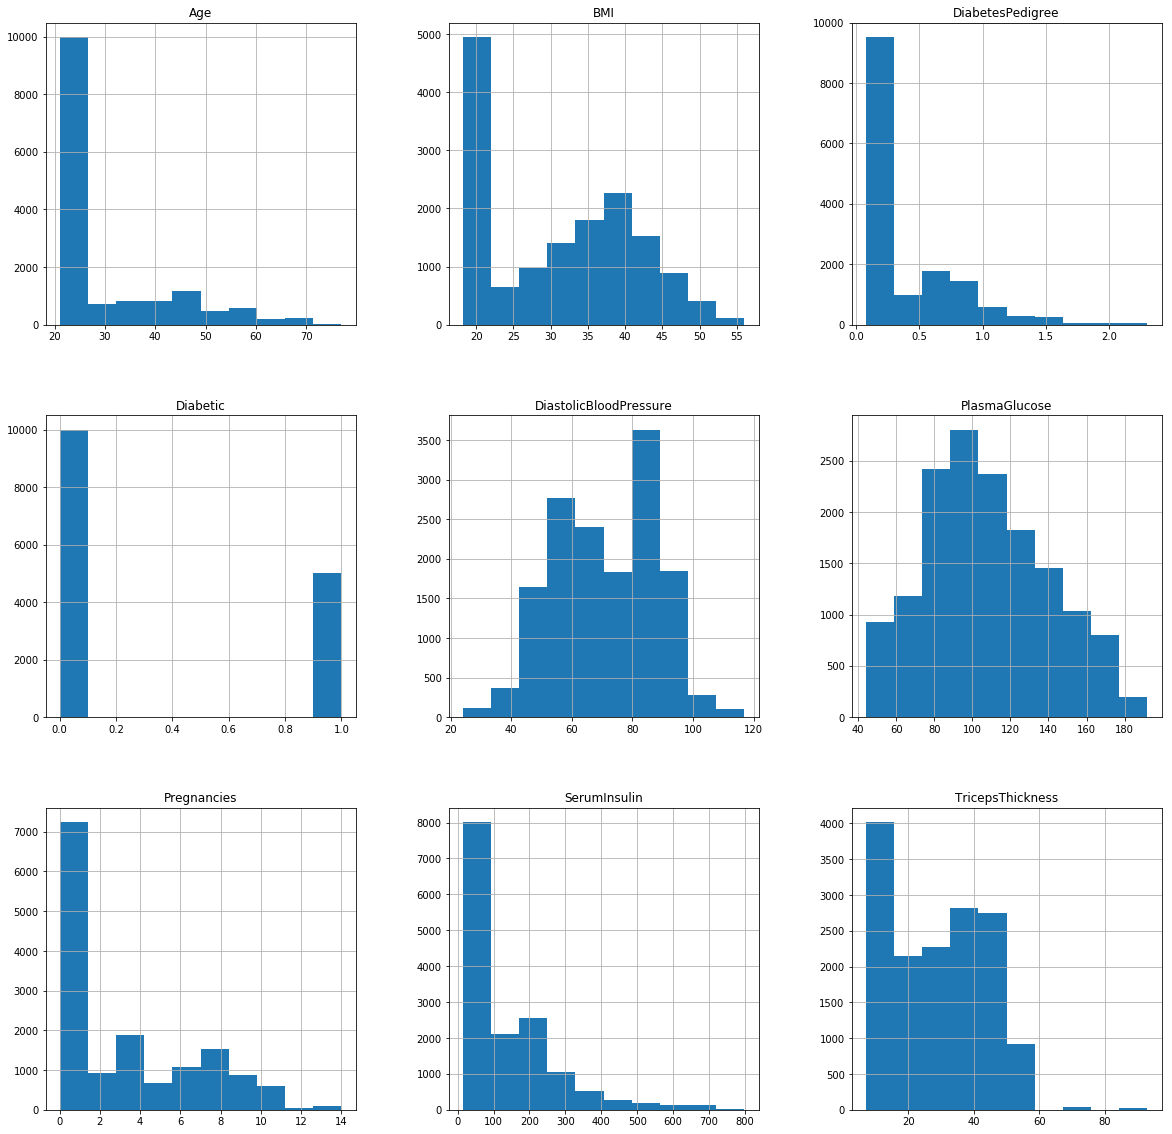

In [7]:
df = dataset_diabetes.loc[:,['Pregnancies','PlasmaGlucose','DiastolicBloodPressure','TricepsThickness', 'SerumInsulin', 
                             'BMI', 'DiabetesPedigree', 'Age', 'Diabetic']]
df.hist(bins=10, figsize=(20, 20))

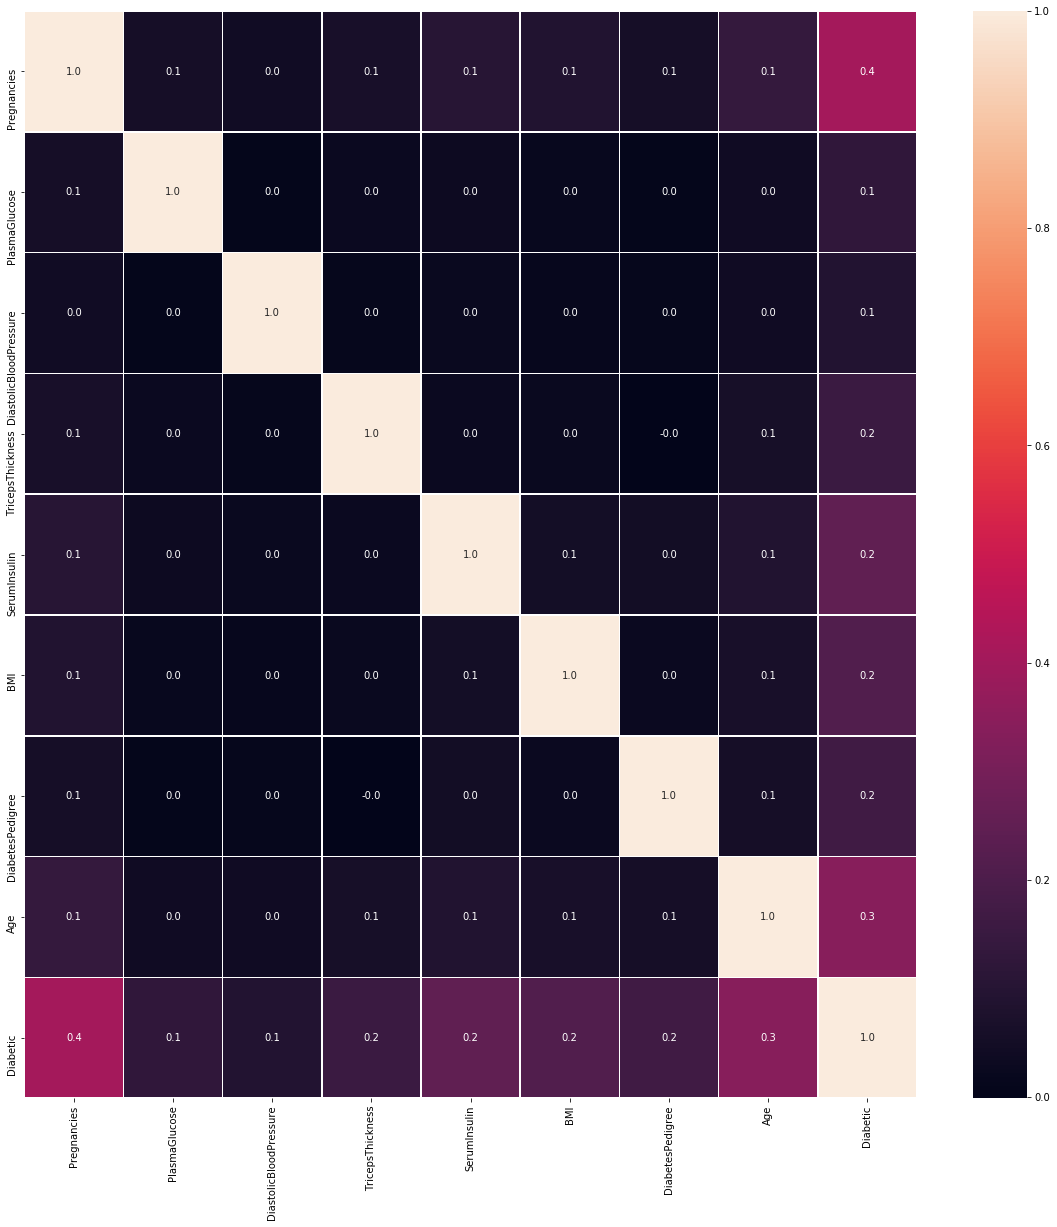

In [8]:
#correlation map
f,ax = plt.subplots(figsize=(20, 20))

sns.heatmap(df.corr(), annot=True, linewidths=.5, fmt= '.1f',ax=ax)

D:\produits\anaconda\lib\site-packages\matplotlib\axes\_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "
D:\produits\anaconda\lib\site-packages\statsmodels\nonparametric\kde.py:488: RuntimeWarning: invalid value encountered in true_divide
  binned = fast_linbin(X, a, b, gridsize) / (delta * nobs)
D:\produits\anaconda\lib\site-packages\statsmodels\nonparametric\kdetools.py:34: RuntimeWarning: invalid value encountered in double_scalars
  FAC1 = 2*(np.pi*bw/RANGE)**2


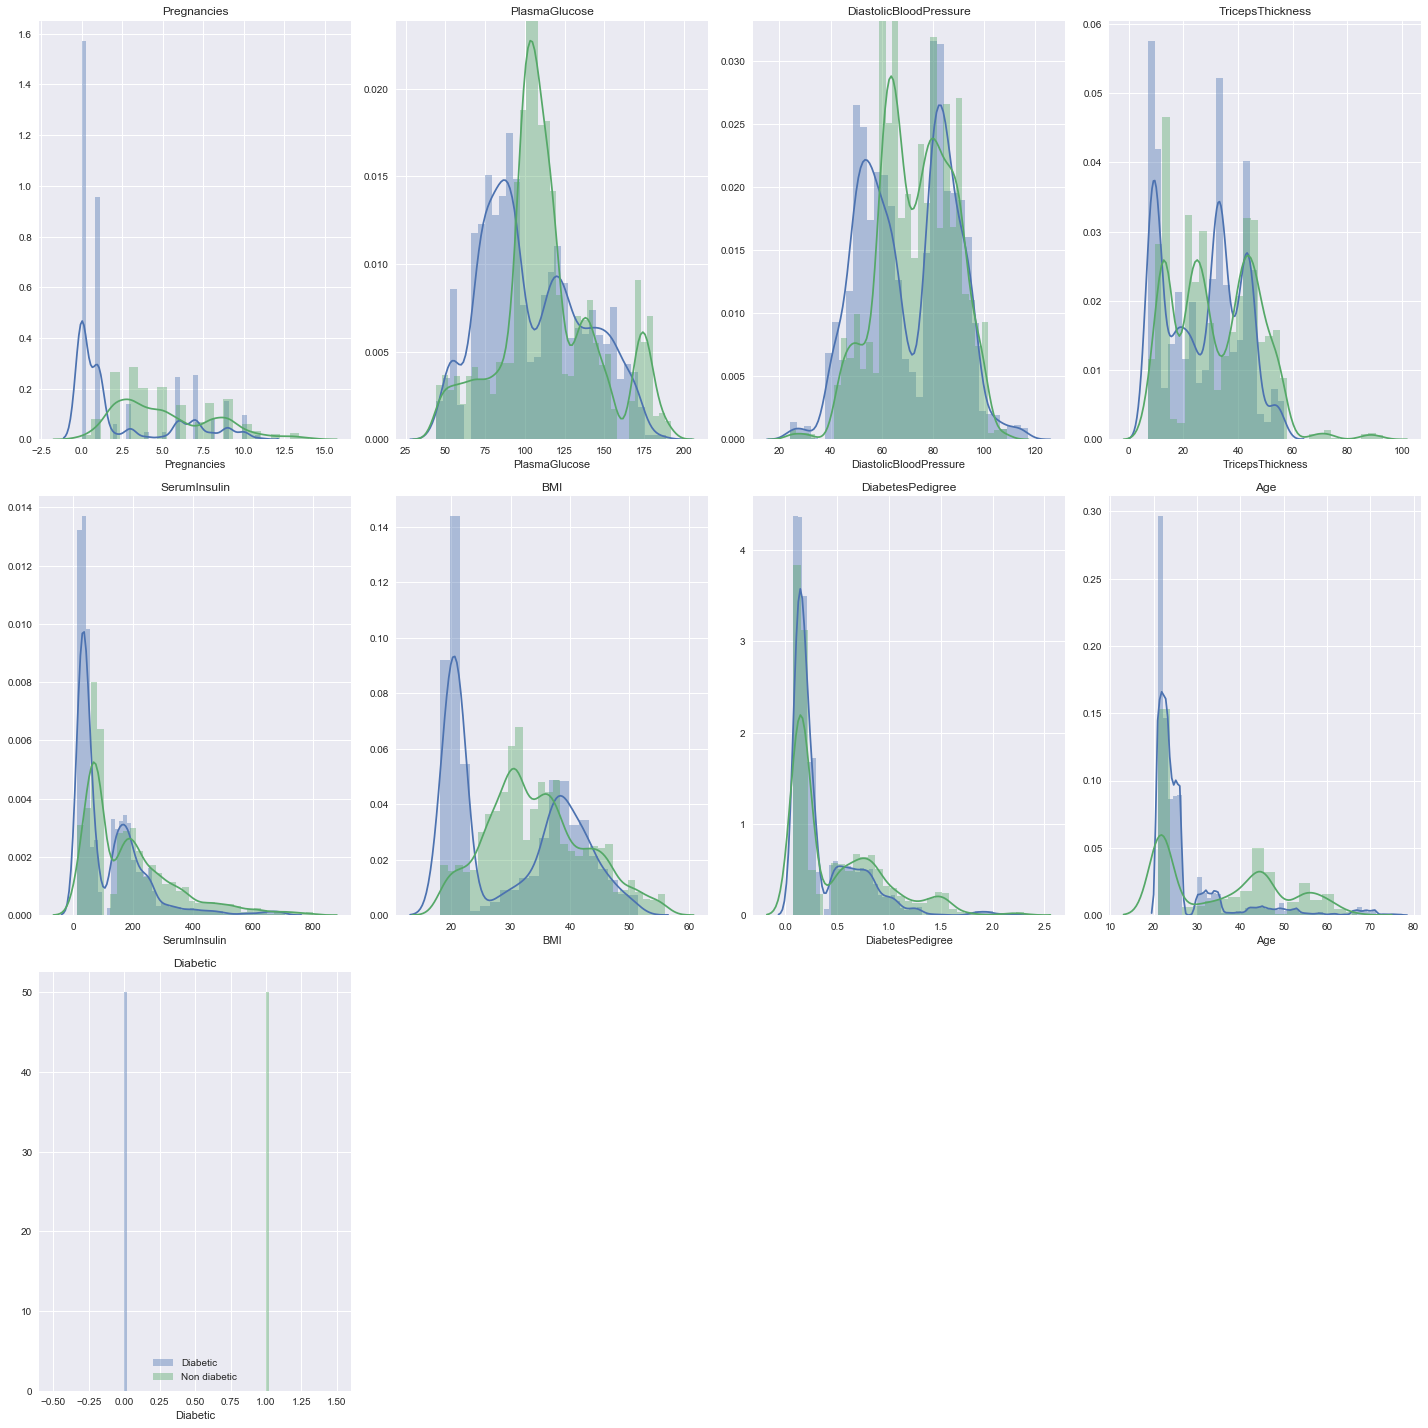

In [15]:
# For visual comparisons of differential diagnosis...
# create to dataframes - one for benign, one for malignant tumor data

df_n = df[df['Diabetic'] == 0]
df_y = df[df['Diabetic'] == 1]

# Instantiate a figure object for OOP figure manipulation.
fig = plt.figure()

# Create 'for loop' to enerate though tumor features and compare with histograms
for i,b in enumerate(list(df.columns[0:9])):
    
    # Enumerate starts at index 0, need to add 1 for subplotting
    i +=1
    
    # Create axes object for position i
    ax = fig.add_subplot(3,4,i)
    
    # Plot via histogram tumor charateristics using stacked and alpha parameters for..
    # comparisons.
    sns.distplot(df_n[b], kde=True, label='Non diabetic')
    sns.distplot(df_y[b], kde=True, label='Diabetic')
   
    ax.set_title(b)

sns.set_style("whitegrid")
sns.set(rc={'figure.figsize':(20,20)})

plt.tight_layout()
plt.legend()
plt.show()

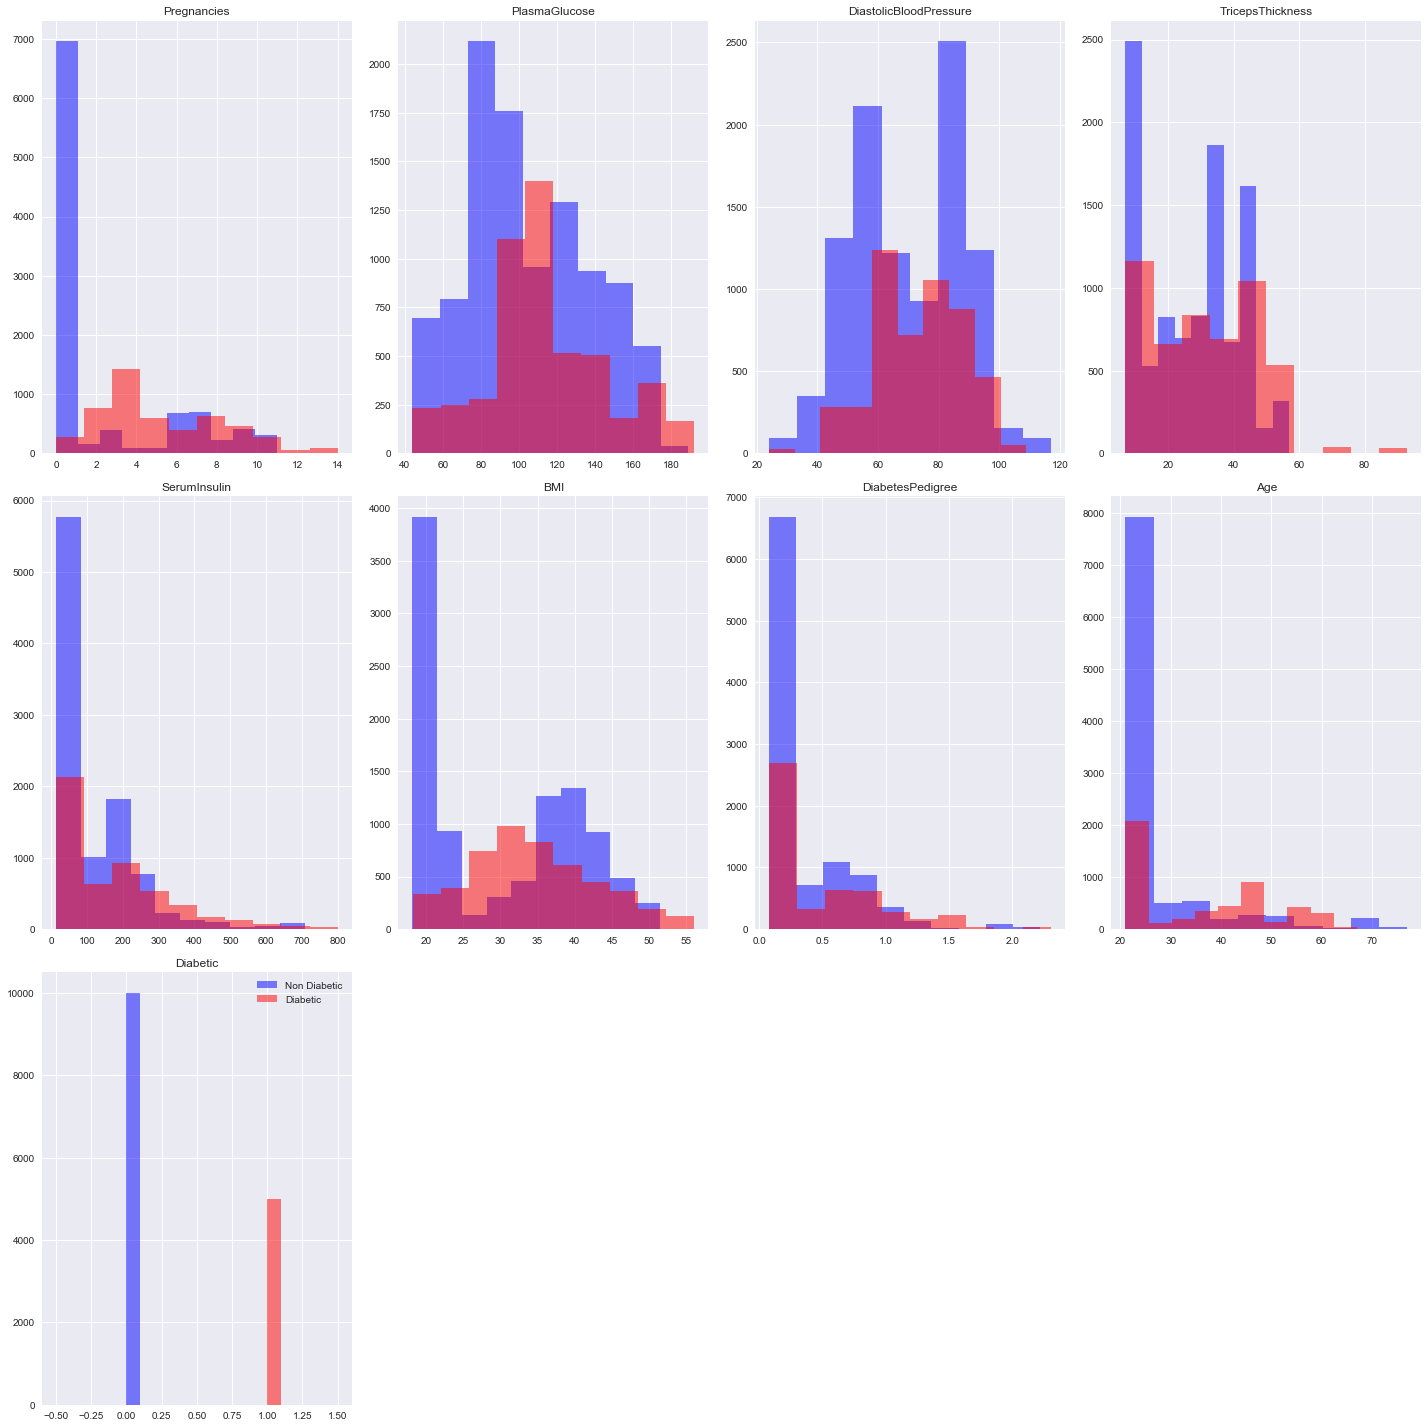

In [16]:
# Instantiate figure object
fig = plt.figure()
#plt.sup_title('Tumor Characteristic (means)')

# Create 'for loop' to enerate though tumor features and compare with histograms
for i,b in enumerate(list(df.columns[0:10])):
    
    # Enumerate starts at index 0, need to add 1 for subplotting
    i +=1
    
    # Create axes object for position i
    ax = fig.add_subplot(3,4,i)
    
    # Plot via histogram tumor charateristics using stacked and alpha parameters for..
    # comparisons.
    ax.hist(df_n[b], label = 'Non Diabetic', stacked = True, alpha=0.5, color= 'b')
    ax.hist(df_y[b], label= 'Diabetic', stacked = True, alpha=0.5, color= 'r')
    
    ax.set_title(b)

sns.set_style("whitegrid")
plt.tight_layout()
plt.legend()
plt.show()